## Introduction to Time Series and Forecasting: Time Series Models

Based on the book [Introduction to Time Series and Forecasting](http://www.masys.url.tw/Download/2002-Brockwell-Introduction%20Time%20Series%20and%20Forecasting.pdf) by Brockwell and Davis


A common objective of any time series analysis is to "understand" the data. While the exact semantics of the term "understand" will vary, a common objective of all the analysis will be to create a *model* that describes the data.

#### What is a time series model?

Notice that the data that we have, no matter how big, do not tell us anything about the values of the time series before, after, or even between the data points that we have observed and recorded. For performing such tasks, we need a model. A time series model is a "compact" way to represent the time series, and the model often allows us to make  predictions or inferences about the parts of the time series that we have not observed.

We may, for example, be able to represent the accidental deaths data and in the data for Lake Huron, as the sum of a speciﬁed trend, and seasonal and random terms. For the interpretation of many data series, it is important to recognize the presence of seasonal components and to remove them so as not to confuse them with long-term trends. This process is known as seasonal adjustment. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn-poster')

#### Some Simple Time Series Models

#### Defining a Time Series Model

* Data: We have a series of data points (the "realization" of the time series): $x_1, x_2, \ldots, x_t, \ldots$
* Model Random Variables: We assume that each data point $x_t$ is an instantiation of a random variable $X_t$. 

Most time series models deal with two main objectives:

* Expected values: find the expected value $E(X_t)$ of $X_t$ for every value of $t$
* Dependencies: find the expected value $E(X_{t+h} | X_t)$ of $X_{t+h}$ given the value of $X_t$ (also called  "covariances")



### Some Zero-Mean Models

##### iid noise

The simplest model for a time series has is one in which there is no trend or seasonal component, all variables has zero mean, and all observations are independent and identically distributed (iid). While iid noise is typically uninteresting process per se, it is and important component when building more complex models, as it is the components that typically models the "inherent variability" of our data.

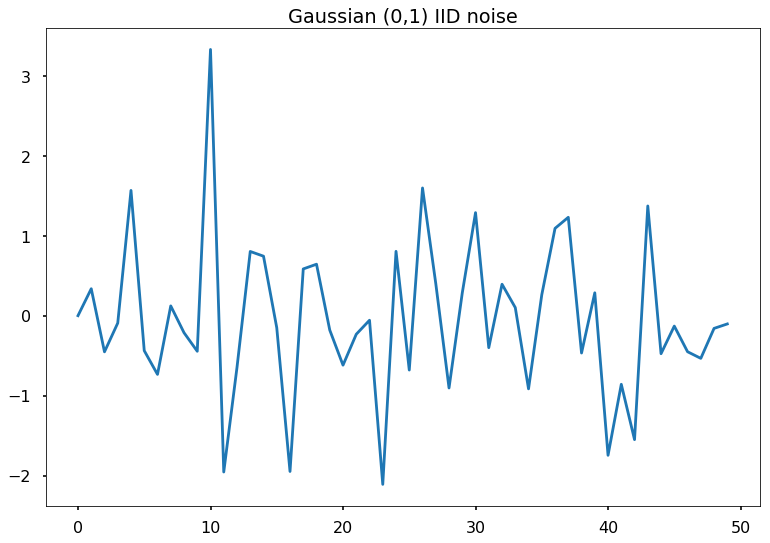

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time series of 50 random data points
# from the “standard normal” distribution (mean zero, standard deviation one)
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn
ts = np.random.randn(50)
# Plot the time series
plt.title("Gaussian (0,1) IID noise")
plt.plot(ts)

##### Random walk 

The random walk is obtained by cumulatively summing iid noise. For example, consider a stock: Assume that every day, the price of the stock changes according to random iid noise. Let's plot the outcome. (Try to run the code a few times and see the different outcomes.)

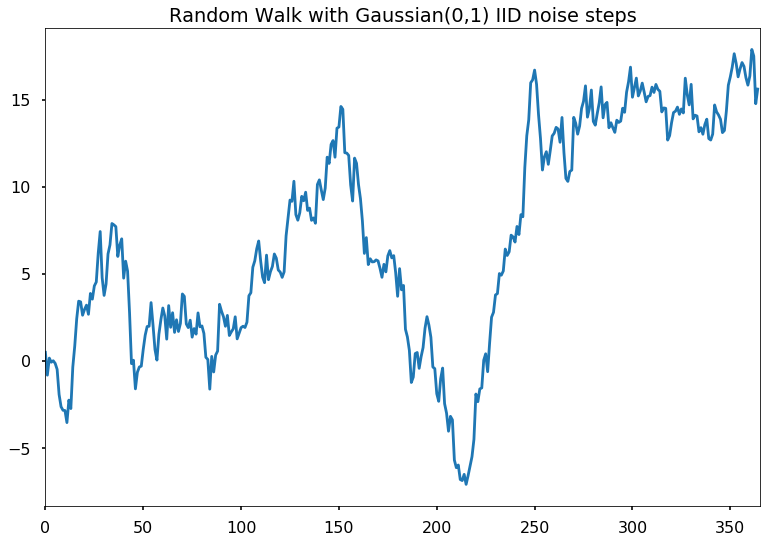

In [3]:
import numpy as np

upper_limit = 365
# Create a time series of random data points
iid_ts = np.random.randn(upper_limit)
# Compute the cumulative sum
random_walk_ts = np.cumsum(iid_ts)
# Plot the time series
plt.title("Random Walk with Gaussian(0,1) IID noise steps")
plt.xlim(0,upper_limit) 
plt.plot(random_walk_ts)

#### A more advanced random walk

In stocks, the overall price of a stock is defined by a cumulative multiplication of daily return. Assuming that the daily returns are log-normal variables (i.e., their log is normally distributed), with a zero mean (i.e., long term the stock remains stable), and a daily variance of 1%, we can construct the following model for stock prices, evolving over a year.

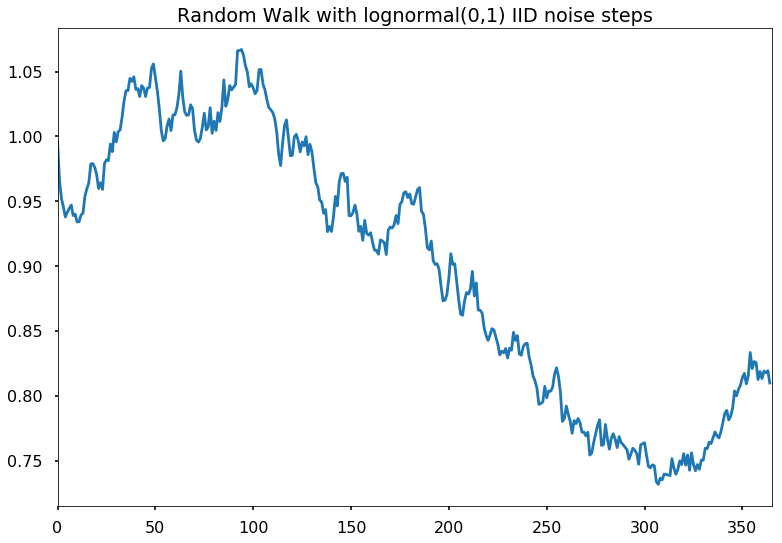

In [4]:
import numpy as np

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01
# Create a time series of random daily returns
iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
# Compute the cumulative product
random_walk_ts = np.cumprod(iid_ts)
# Plot the time series
plt.title("Random Walk with lognormal(0,1) IID noise steps")
plt.xlim(0,ts_length) 
plt.plot(random_walk_ts)

##### Simulations: What could have been

Here is not an example of why a model can be useful. When we deal with time series, we often see just one instantiation of the time series, describing what happened. However, we also want to have an understanding what _could_ have happened. For example, we would like to understand better how a stock would move, we could run multiple simulatations and see the expected results. For example, below we will create 1000 simulations of the random walk discussed above, and see the expected results of a stock.

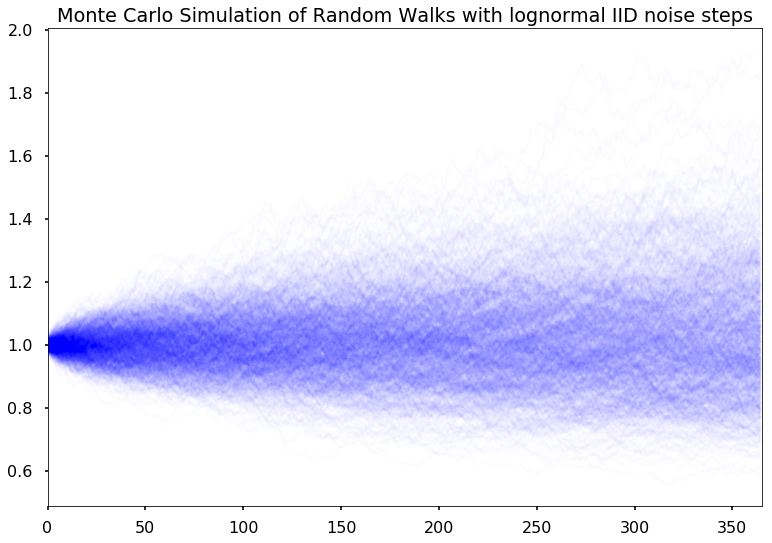

In [5]:
import numpy as np

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01

# We will do 1000 simulations of the random walk
plt.title("Monte Carlo Simulation of Random Walks with lognormal IID noise steps")
plt.xlim(0,upper_limit)
for _ in range(1000):
    # Create a time series of random daily returns
    iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
    # Compute the cumulative product
    random_walk_ts = np.cumprod(iid_ts)
    # Add the line in the plot. 
    # We set the transparency of each line to be high (alpha=0.01 means 99% transparent) 
    plt.plot(random_walk_ts, alpha=0.01, color='b')


##### Plotting Quantiles

And now we will take this Monte Carlo simulation, and we will compute the quantiles of the simulation. 

Specifically, we will examine the threshold for the 10% lowest performing stocks, the 25% lowest perfoming stocks, 50%, 75%, and 90%. For that we first create a dataframe, with multiple columns, one column per single simulation of the time series. Then, we run the [`quantile`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) command, computing the quantile numbers for each row of the dataframe (hence the use of `axis=1`). This returns a dataframe with 5 rows (one row per quantile), and 365 columns; to reshape it, we take the _transpose_ (hence the `.T` at the end) and we plot the result.

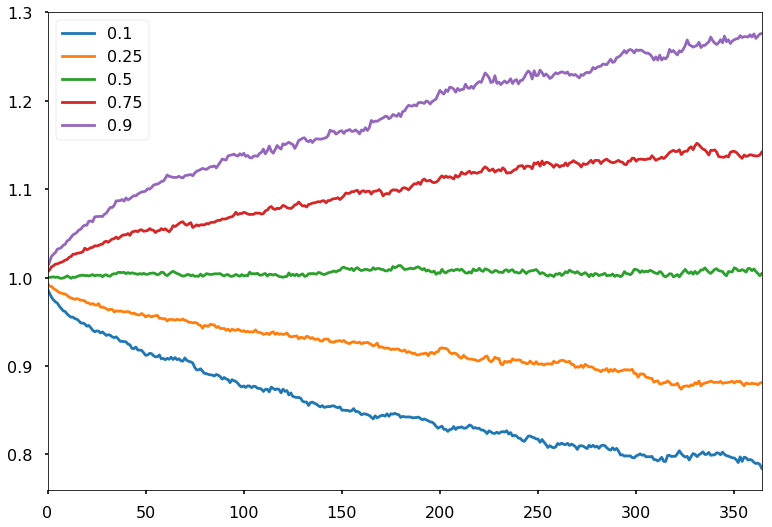

In [6]:
import numpy as np

df = pd.DataFrame()

# The length of our time series
ts_length = 365
# The expected yearly return
mean_yearly_return = 0.0
# Converting the yearly return into a daily return
mean_daily_return = (1+mean_yearly_return)**(1.0/ts_length)-1
# Our expected stock variance each day.
# We set it at a +/- 1% daily movement
daily_variance = 0.01

# We will do 1000 simulations of the random walk
for x in range(1000):
    # Create a time series of random daily returns
    iid_ts = np.random.lognormal(mean = mean_daily_return, sigma=daily_variance, size=ts_length)
    # Compute the cumulative product
    random_walk_ts = np.cumprod(iid_ts)
    # Add the line in the dataframe. 
    df.insert(x, "Run"+str(x), random_walk_ts)

quantiles = df.quantile(q=[0.1,0.25,0.5,0.75,0.90], axis=1).T
quantiles.plot()


#### Models with Trend and Seasonality

In several of the time series examples shown earlier, there is a clear trend in the data. An increasing trend is apparent in both the Australian red wine sales and the population of the U.S.A. In both cases a zero-mean model for the data is clearly inappropriate. The graph of the population data, which contains no apparent periodic component, suggests trying a model of the form $X_t =  m_t +Y_t$ where $m_t$ is the a time series called the *trend component* and $Y_t$ is a time series with zero mean (see above). 


##### Extracting the trend component

One technique that we can use to extract the trend component from a time series is by fitting a function to the time series, using for example the _least squares_ procedure. For example, for the US population date, we will try to fit a quadratic function of the form:

$m_t = a_2 \cdot t^2 + a_1 \cdot t + a_0$

To ﬁt a function of the to the population data we will first normalize the year data, and relabel the time axis so that $t=1$ corresponds to 1780 and $t=24$ corresponds to 2010. Then we will utilize the `statsmodel` package of Python to fit an ordinary least squares.

In [7]:
!sudo -H pip3 install statsmodels

In [8]:
import statsmodels.formula.api as sm

df = pd.read_csv("data/us-population2.txt", sep=' ', thousands=',')
df["US_Population"] = pd.to_numeric(df["US_Population"])
# Normalize/relabel the time variables
df["Year_Norm"] = (pd.to_numeric(df["Year"])-1770)/10
# Add a "constant" column, to be used later while we fit the trend function
df["Constant"] = [1]*len(df)


In [9]:
# Fit a function using the ordinary least squares process (OLS)
model = sm.ols(formula = 'US_Population ~ np.power(Year_Norm, 2) + Year_Norm + Constant', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          US_Population   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           2.14e-32
Time:                        16:00:13   Log-Likelihood:                -391.41
No. Observations:                  24   AIC:                             788.8
Df Residuals:                      21   BIC:                             792.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.846e+06   1.04e+06      4.641      0.000    2.67e+06    7.02e+06
np.power(Year_Norm, 2)  6.666e+05   1.49e+04     44.605      0.000    6.36e+05    6.98e+05
Year_Norm              -3.683e+06   3.85e+05     -9.569      0.000   -4.48e+06   -2.88e+06
Constant                4.846e+06   1.04e+06      4.641      0.000    2.67e+06    7.02e+06
==============================================================================
Omnibus:                       12.848   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.450
Skew:                          -1.452   Prob(JB):                      0.00326
Kurtosis:                       4.737   Cond. No.                     2.36e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
# Plotting using Matplotlib directly
# fig, ax = plt.subplots(figsize=(15,10))
# ax.plot(df["Year"], df["US_Population"], 'o', label="data")
# ax.plot(df["Year"], df["Prediction"], 'r--.', label="prediction")
# ax.legend(loc='best');

In [11]:
# Adding predictions in the dataframe, removing unecessary columns
# setting Year as the index, and calculating residuals
df["Prediction"] = pd.to_numeric(model.fittedvalues).astype(int)
df.set_index(keys="Year", inplace=True)
df.drop(["Year_Norm", "Constant"], axis=1, inplace=True)
df["Residuals"] = df["US_Population"] - df["Prediction"]

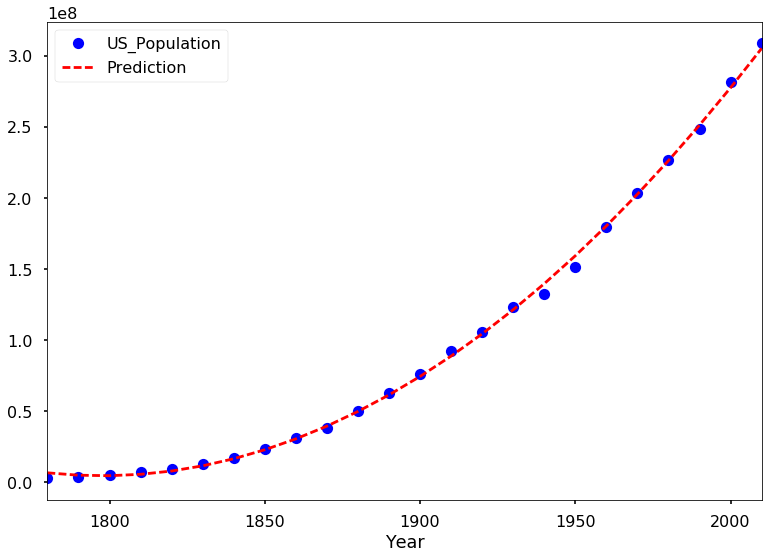

In [12]:
# Plotting the actual data and the prediction
df[["US_Population","Prediction"]].plot(style=['bo','r--'], label=["data", "prediction"])

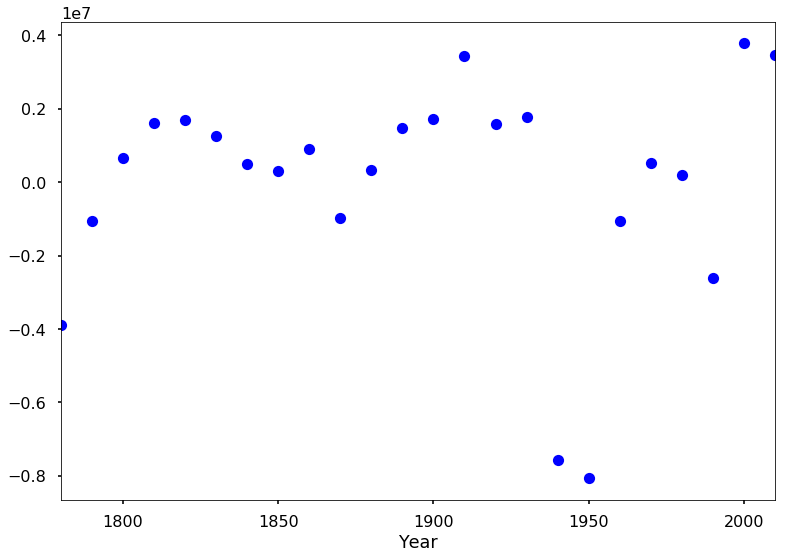

In [13]:
# Plotting the residuals
df["Residuals"].plot(style='bo')

We will now repeat the process for the Lake Huron dataset

In [14]:
df = pd.read_csv("data/lake-huron.txt", sep='\t')
df["Year_Norm"] = (pd.to_numeric(df["Year"])-1874)
# Add a "constant" column, to be used later while we fit the trend function
df["Constant"] = [1]*len(df)

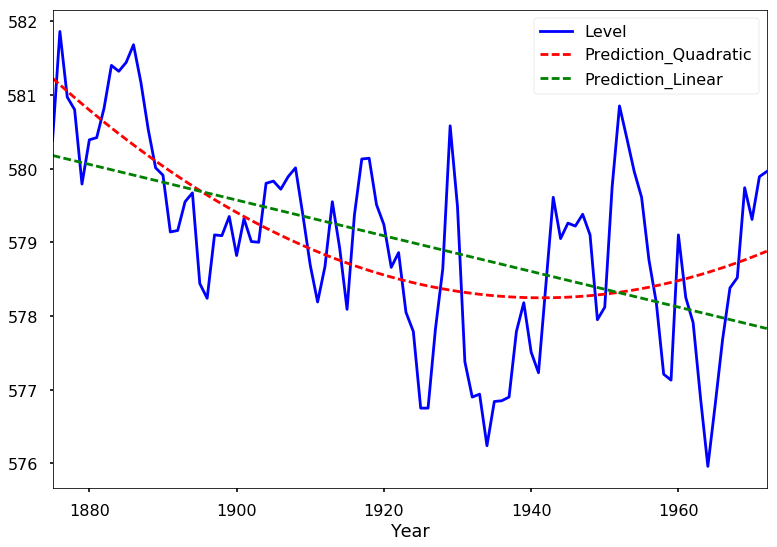

In [15]:
model_quadratic = sm.ols(formula = 'Level ~ np.power(Year_Norm, 2) + Year_Norm + Constant', data = df).fit()
model_linear = sm.ols(formula = 'Level ~ Year_Norm + Constant', data = df).fit()

df["Prediction_Quadratic"] = pd.to_numeric(model_quadratic.fittedvalues)
df["Prediction_Linear"] = pd.to_numeric(model_linear.fittedvalues)
df.set_index(keys="Year", inplace=True)
df.drop(["Year_Norm", "Constant"], axis=1, inplace=True)
df["Residuals_Quadratic"] = df["Level"] - df["Prediction_Quadratic"]
df["Residuals_Linear"] = df["Level"] - df["Prediction_Linear"]
df[["Level","Prediction_Quadratic", "Prediction_Linear"]].plot(style=['b-','r--', 'g--'], 
                                                               label=["data", "prediction (quadratic)", "prediction (linear)"])

Let's take a look at the residuals.

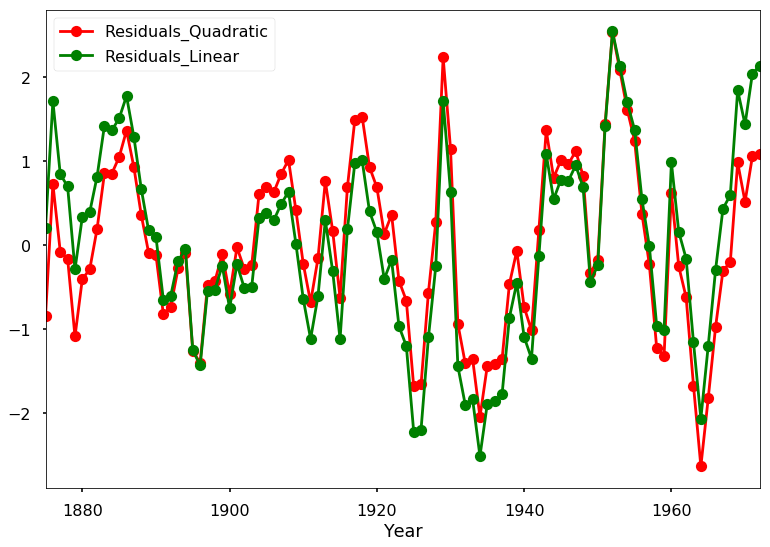

In [16]:
df[["Residuals_Quadratic", "Residuals_Linear"]].plot(style=['ro-','go-'])

### Lag Plots and Autocorrelation

One interesting thing about these residuals is that they are "smooth", and that the sign of the error at time $t$ seems to be predictive of the sign of the erorr at time $t+1$. Such dependency would indicate that there is a *autocorrelation* in the errors. We can use two types of plots to assess the existence of autocorrelation.

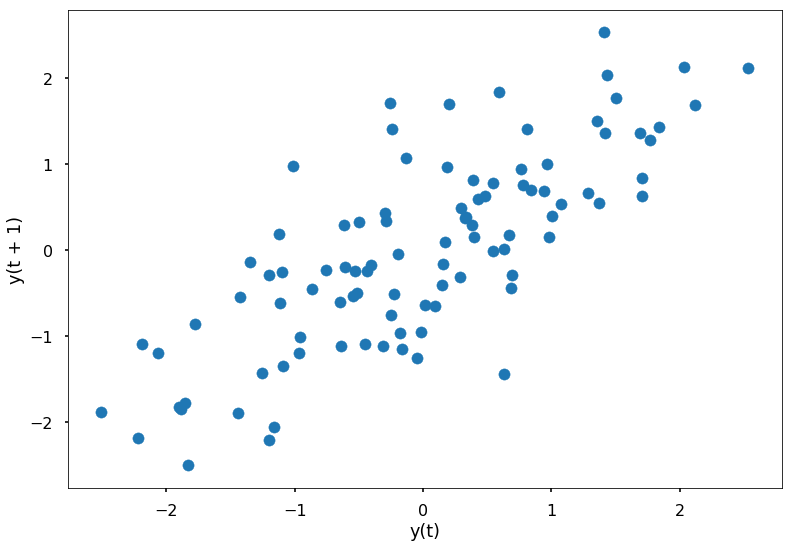

In [17]:
from pandas.tools.plotting import lag_plot
lag_plot(df["Residuals_Linear"])

This lag plot indicates a clear linear dependency between two consecutive residual values, signaling an autocorrelation

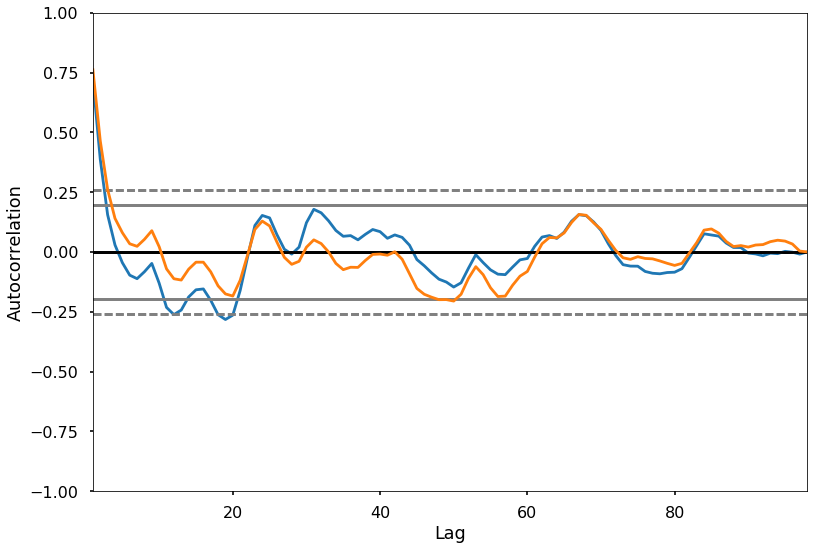

In [18]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df["Residuals_Quadratic"])
autocorrelation_plot(df["Residuals_Linear"])


#### A General Approach to Time Series Modeling

### Stationary Models and the Autocorrelation Function
#### The Sample Autocorrelation Function
#### A Model for the Lake Huron Data

### Estimation and Elimination of Trend and Seasonal Components
####  Estimation and Elimination of Trend in the Absence of Seasonality
#### Estimation and Elimination of Both Trend and Seasonality

### Testing the Estimated Noise Sequence

### Problems